<a href="https://colab.research.google.com/github/cynthiatcelorio/ML_Clustering/blob/main/dani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install clustimage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.1 MB/s 
     |████████████████████████████████| 296 kB 12.8 MB/s 
     |████████████████████████████████| 1.1 MB 15.0 MB/s 
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=a19b714181fb4aaf1b2745d518b3ec19503475aac5ab35aad46a6eff6fe2a878
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=96a5404031a0678511f2e9beaec1da7a8e5dbf0030e17721439e05d5810aa399
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=37cb18972c717897c7c1717d58702af0edece1bc27b99e09a9c6ab61909b9db0
  Stored in directory: /root/.cache/pip/

In [2]:
# librerias
from glob import glob
import matplotlib.pyplot as plt
from skimage import color
from skimage.color import rgb2gray
from skimage.io import imshow, imread
from clustimage import Clustimage

import cv2


In [10]:
!git clone "https://github.com/cynthiatcelorio/ML_Clustering_Data.git"

ruta_train = "/content/ML_Clustering_Data/train"
ruta_test = "/content/ML_Clustering_Data/test"

fatal: destination path 'ML_Clustering_Data' already exists and is not an empty directory.


In [88]:
train_images = glob('/content/ML_Clustering_Data/train/*')

In [89]:
len(train_images)

7889

### Preprocesamiento de las imágenes

Antes de extraer características de las imágenes, tenemos que llevar a cabo un preprocesamiento para poder comparar las imágenes en lo referente a color y valor.

In [97]:
import cv2

# Cargar dataset
images_entrenamiento = []

for i in range(0, len(train_images)):
    img = cv2.imread(train_images[i])
    images_entrenamiento.append(img)

La librería Clustimage cuenta con una función *imread* que premite escalar las imagenes a una dimensión concreta y pasarlas a escala de grises asignando al parámetro *colorscale* el valor 0.

In [91]:
# Inicializar
'''cl = Clustimage()

# Cargar dataset
images_entrenamiento = []

for i in range(0, len(train_images)):
    img = cl.imread(train_images[i], dim=(128, 128), colorscale=0, flatten=True)
    images_entrenamiento.append(img)

"""
img = cl.imread(train_images[1980], dim=(128, 128), colorscale=1, flatten=True)

print(img)


# proximo objetivo: plottear como 9 a la vez, mirar por algun lado
plt.figure()
plt.imshow(img.reshape(128,128,3))
plt.axis('off')"""

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]


"\nimg = cl.imread(train_images[1980], dim=(128, 128), colorscale=1, flatten=True)\n\nprint(img)\n\n\n# proximo objetivo: plottear como 9 a la vez, mirar por algun lado\nplt.figure()\nplt.imshow(img.reshape(128,128,3))\nplt.axis('off')"

In [98]:
#IDEA: PASAR TODO A BLANCO Y NEGRO Y PASAR A BLANCO (255) LO QUE ESTE POR ENCIMA DE YOQUESE 102
#ejemplo breve:
'''
print(len(images_entrenamiento))
#5264

# prueba para cualquier imagen pero funciona
img = images_entrenamiento[555]

plt.figure()
plt.imshow(img.reshape(128, 128))
plt.axis('off')

'''

7889


ValueError: ignored

<Figure size 432x288 with 0 Axes>

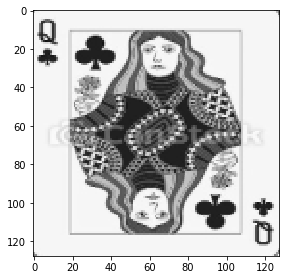

In [95]:
'''from skimage import io
img = img.reshape(128, 128)
mask = img < 87
#img[mask] = 255
io.imshow(img)'''

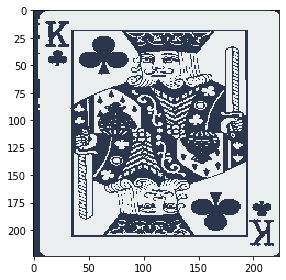

In [163]:
# Hacemos dos clusters con SKMEANS  (?) y así lo separamos mayoritariamente entre el fondo de la carta y el dibujo

img = images_entrenamiento[235]

img2 = img.reshape((-1, 3))
img2 = np.float32(img2)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Clusters
k=2

attempts = 10
ret,label,center=cv2.kmeans(img2, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv2.imwrite("aaaa.jpg", res2)

io.imshow(res2)

In [ ]:
#######################
# PRUEBA GUARRA   #
#######################

# imgb = color.rgb2gray(img)

"""
mask = img < 87
img[mask] = 255


plt.figure()
plt.imshow(imgb)
plt.axis('off')
"""

### Entrenamiento del modelo

## Otros

Ajustes básicos de imágenes (Escala de grises, rotar y recortar)

https://www.youtube.com/watch?v=uDNqNv2N-pY&list=PLZsOBAyNTZwYHBIlu_PUO19M7aHMgwBJr&index=19

Image segmentation

https://www.youtube.com/watch?v=6CqRnx6Ic48&list=PLZsOBAyNTZwYHBIlu_PUO19M7aHMgwBJr&index=52